# statsmodels

[Link to the statsmodels homepage](https://www.statsmodels.org/)

***`statsmodels`*** is a versatile Python package for statistical analyses. It provides the R-style model description with Pandas dataframe as well as raw Numpy arrays. Its analysis result is rich and full of detailed information.

Many statistical models and corresponding fitting and testing routines are provided, including OLS, GLM, Logit, MANOVA, etc.

It also provides some useful plotting routines.

See [API Reference](https://www.statsmodels.org/stable/api.html) for a full list of models and functions.

There are many commented examples on the internet. E.g.: 
- https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/
- https://scipy-lectures.org/packages/statistics/index.html
- http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/



---

***Jargon***: statsmodels uses two strange jargons: `exog`, and `endog`: `exog` means exogenous, i.e., independent variables or predictors (x). `endog` means endogenous, i.e., dependent variables (y).

---

Note: There is another statistical package called ***`scikit-learn`*** (see [here](https://scikit-learn.org/stable/tutorial/index.html)). It focuses on machine learning or statistical learning (regression, classification, pattern recognition, etc), whereas `statsmodels` focuses on statistical models and statistical tests (generalized linear models, t-test, analysis of variance, etc).  Finally, ***`scipy`*** has a huge collection of statistical functions and tests as well (see [here](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)).  Which one to use in your application depends on your goal. For example, `statsmodels` provide a detailed analysis output. `scipy` statistics package provides efficient algorithms for many aspects of statistics. `scikit-learn` is specialized in machine learning.

If you're interested in ***Biostatistics***, you should study all three packages as you learn statistics.

cf) If you are interested in AI related machine learning (such as convolutional neural network or deep learning), the package you want to check is ***`TensorFlow`***. [Link](https://www.tensorflow.org/)

If you are interested in Bayesian statistics, you should check ***`Pymc3`*** [Link](https://docs.pymc.io/) and ***`stan`*** [Link](https://pystan.readthedocs.io/) packages.

---

For fun: https://www.gapminder.org/

---

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# The breast cancer data is in wdbc.data and wdbc.names. It was downloaded from: 
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

bcd = pd.read_csv('data/wdbc.data', header = None, usecols=np.arange(12), index_col=0)
bcd.columns = [ 'Diagnosis', 'Radius','Texture', 'Perimeter', 'Area', 'Smoothness',
              'Compactness','Concavity','Concave points','Symmetry','Fractal dimension']
bcd.index.name = 'ID'
bcd.head()

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave points,Symmetry,Fractal dimension
ID,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# Statistics



Below is an example of performing linear regression analysis. In R language (and statsmodels package), they often use a `formula` to describe the regression model spec. Below are two links about how to write a formula to describe a regression model.

[R formular description](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/formula) <br>
[Another good description of the formula language](https://patsy.readthedocs.io/en/latest/formulas.html#the-formula-language)

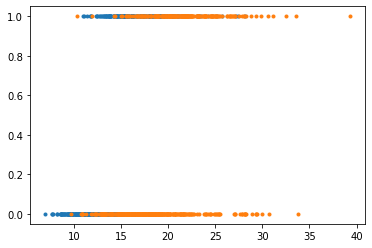

In [9]:
bcd["Bool_Diagnosis"] = (bcd["Diagnosis"]=='M').astype('int')  # Categorical data can't be used for regression model

import matplotlib.pyplot as plt
plt.plot(bcd.Radius, bcd.Bool_Diagnosis, '.')
plt.plot(bcd.Texture, bcd.Bool_Diagnosis, '.')

In [10]:
# R-style model description
# Don't forget to add "1" to subtract the mean, when using Ordinary Least Squares regression model.
mdl = smf.ols('Bool_Diagnosis ~ np.log(Radius) + Texture + 1', data=bcd)

# Fit the model
results = mdl.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Bool_Diagnosis   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     368.9
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          2.82e-103
Time:                        07:44:36   Log-Likelihood:                -156.49
No. Observations:                 569   AIC:                             319.0
Df Residuals:                     566   BIC:                             332.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5927      0.149    -24.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     368.9
Date:                Sat, 06 Mar 2021   Prob (F-statistic):          2.82e-103
Time:                        06:40:29   Log-Likelihood:                -156.49
No. Observations:                 569   AIC:                             319.0
Df Residuals:                     566   BIC:                             332.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5927      0.149    -24.170      0.0

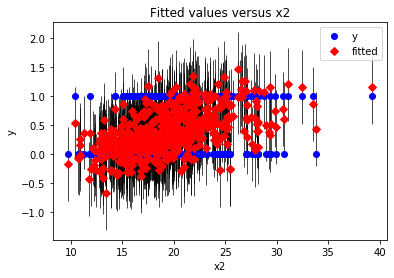

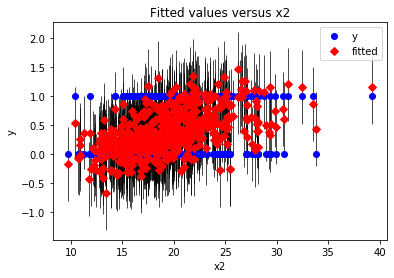

In [4]:
# The same Ordinary Least Squares regression analysis can be done with Numpy arrays.

y = bcd.Bool_Diagnosis.to_numpy()
x = np.asarray(bcd.loc[:,["Radius","Texture"]])  # the same as .to_numpy()
x[:,0] = np.log(x[:,0])

# To use Numpy array, 'sm.OLS()' is used instead of 'smf.ols()'
# Don't forget to add sm.add_constant() or np.ones(len(y)) to include a constant term.

mdl = sm.OLS(y, sm.add_constant(x))    # model description with Numpy arrays
results = mdl.fit()                    # fitting the model
print(results.summary())
# Note: Internally, 'smf.ols()' uses 'sm.OLS()'. So the result should be exactly the same.


# https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_fit.html
sm.graphics.plot_fit(results,2)

In [5]:
# An example of using Generalized Linear Model  https://www.statsmodels.org/stable/glm.html

y = bcd.Bool_Diagnosis.to_numpy()
x = bcd.loc[:,["Radius","Texture", 'Smoothness', 'Compactness','Concavity','Symmetry']].to_numpy()  # the same as .to_numpy()

gaussian_model = sm.GLM(y, sm.add_constant(x), family=sm.families.Gaussian())
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  569
Model:                            GLM   Df Residuals:                      562
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                        0.081946
Method:                          IRLS   Log-Likelihood:                -92.122
Date:                Sat, 06 Mar 2021   Deviance:                       46.054
Time:                        06:40:30   Pearson chi2:                     46.1
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8349      0.158    -11.596      0.0

In [6]:
# t-test
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html

import statsmodels.stats.weightstats as ws

a = bcd.loc[ bcd.Diagnosis == 'M' , 'Radius' ]
b = bcd.loc[ bcd.Diagnosis == 'B' , 'Radius' ]

tstat, pvalue, df = ws.ttest_ind(a,b)
print('test statistics:', tstat)
print('degree of freedom:', df)
print('p-value:', pvalue)

test statistics: 25.435821610057015
degree of freedom: 567.0
p-value: 8.46594057226676e-96
